In [3]:
%load_ext autoreload
%autoreload 2

# Exploratory Data Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_npz = np.load('./train.npz')
train_data = train_npz['data']
test_npz  = np.load('./test_input.npz')
test_data  = test_npz['data']

In [6]:
print(train_data.shape, test_data.shape)

# Split once for later use
X_train = train_data[..., :50, :]
Y_train = train_data[:, 0, 50:, :2]

(10000, 50, 110, 6) (2100, 50, 50, 6)


In [5]:
def plot_heatmap(data, title=None, bins=5):
    plt.figure(figsize=(6, 6))

    x_max = data[..., 0].max()
    x_min = data[..., 0].min()
    y_max = data[..., 1].max()
    y_min = data[..., 1].min()

    plt.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='hot')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.colorbar(label='Density')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [6]:
xy_in = train_data[:, :, :50, :2].reshape(-1, 2)
# only find the x, y != 0
xy_in_not_0 = xy_in[(xy_in[:, 0] != 0) & (xy_in[:, 1] != 0)]

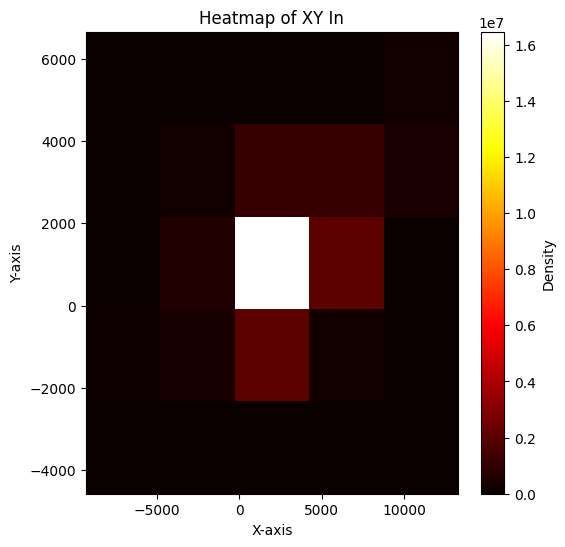

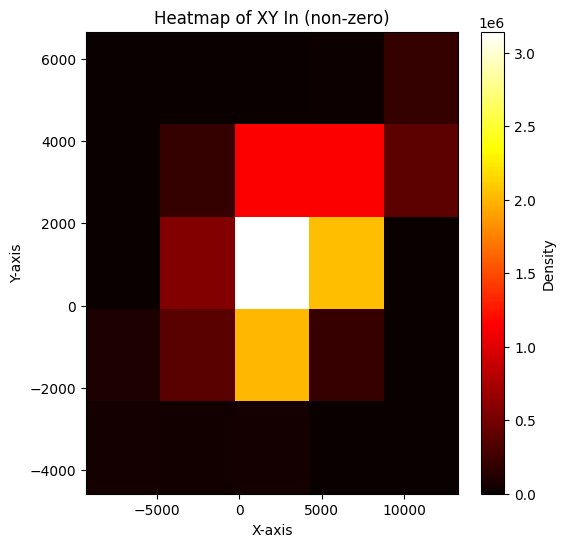

In [7]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=5)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=5)

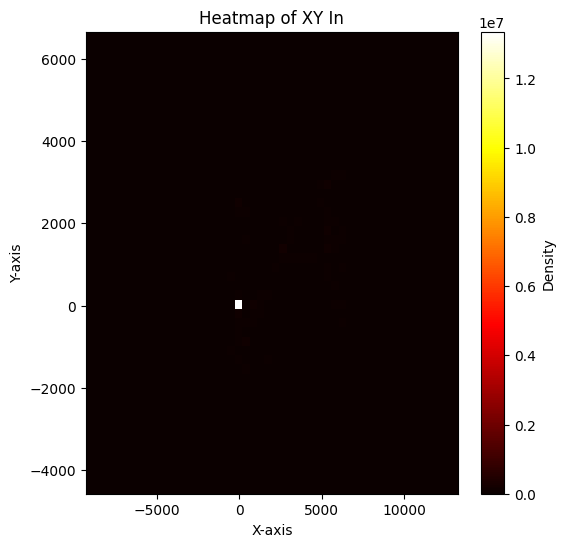

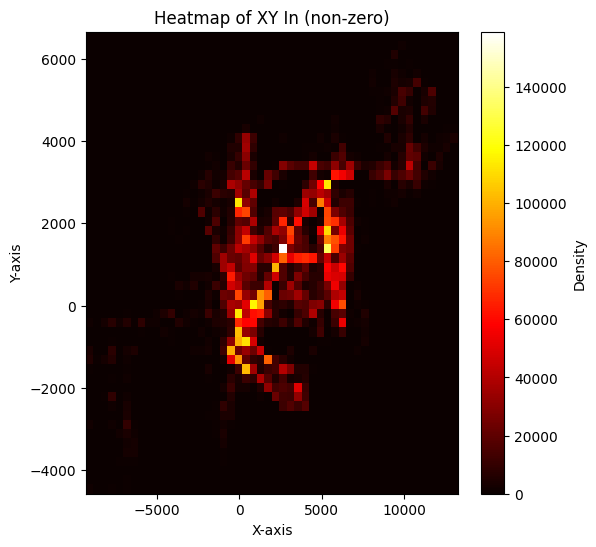

In [ ]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=50)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=50)

## Visualize Trajectories

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# make gif out of a scene.
def make_gif(data_matrix, name='example'):
   cmap = plt.cm.get_cmap('viridis', 50)
   fig, ax = plt.subplots(figsize=(10, 10))
   # Function to update plot for each frame
   def update(frame):
       ax.clear()

       # Get data for current timestep
       for i in range(1, data_matrix.shape[0]):
           x = data_matrix[i, frame, 0]
           y = data_matrix[i, frame, 1]
           if x != 0 and y != 0:
               xs = data_matrix[i, :frame+1, 0]  # Include current frame
               ys = data_matrix[i, :frame+1, 1]  # Include current frame
               # trim all zeros
               mask = (xs != 0) & (ys != 0)  # Only keep points where both x and y are non-zero
               xs = xs[mask]
               ys = ys[mask]

               # Only plot if we have points to plot
               if len(xs) > 0 and len(ys) > 0:
                   color = cmap(i)
                   ax.plot(xs, ys, alpha=0.9, color=color)
                   ax.scatter(x, y, s=80, color=color)

       ax.plot(data_matrix[0, :frame, 0], data_matrix[0, :frame, 1], color='tab:orange', label='Ego Vehicle')
       ax.scatter(data_matrix[0, frame, 0], data_matrix[0, frame, 1], s=80, color='tab:orange')
       # Set title with timestep
       ax.set_title(f'Timestep {frame}')
       # Set consistent axis limits
       ax.set_xlim(data_matrix[:,:,0][data_matrix[:,:,0] != 0].min() - 10, data_matrix[:,:,0][data_matrix[:,:,0] != 0].max() + 10)
       ax.set_ylim(data_matrix[:,:,1][data_matrix[:,:,1] != 0].min() - 10, data_matrix[:,:,1][data_matrix[:,:,1] != 0].max() + 10)
       ax.legend()

       return ax.collections + ax.lines

   # Create animation
   anim = animation.FuncAnimation(fig, update, frames=list(range(0, data_matrix.shape[1], 3)),
                               interval=100, blit=True)
   # Save as GIF
   anim.save(f'trajectory_visualization_{name}.gif', writer='pillow')
   plt.close()


In [10]:
data_matrix = train_data[0]        
make_gif(data_matrix, 'index0')

/var/folders/c3/nf0b8q01303dvc7nr1m9s8fw0000gn/T/ipykernel_70576/3995722619.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 50)
